In [1]:
import pickle
import pystan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [2]:
df = pd.read_csv("input/data-salary.txt")
df.head()

,X,Y
0,24,472
1,24,403
2,26,454
3,32,575
4,33,546


In [3]:
with open("output/result-model4-5.pkl", "rb") as f:
    stan_model = pickle.load(f)
    fit = pickle.load(f)
ms = fit.extract()

In [4]:
X_new = [i for i in range(23, 61)]
N_X = len(X_new)
N_mcmc = len(ms["lp__"])

In [5]:
np.random.seed(1234)
y_base_mcmc = []
y_mcmc = []
for xi in X_new:
    y_base_mcmc.append(ms["a"] + ms["b"] * xi)
    y_mcmc.append(np.random.normal(y_base_mcmc[-1], ms["sigma"], N_mcmc))

In [6]:
def get_quantile_mcmc(y_mcmc, p):
    ret = []
    return [np.percentile(yi, p) for yi in y_mcmc]

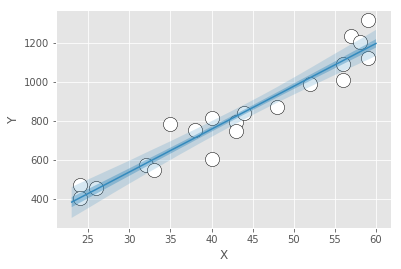

In [7]:
plt.scatter(df["X"],  df["Y"], s=200, color="white", edgecolors="black")
plt.fill_between(X_new, get_quantile_mcmc(y_base_mcmc, 2.5), get_quantile_mcmc(y_base_mcmc, 97.5), facecolor="C1", alpha=0.2)
plt.fill_between(X_new, get_quantile_mcmc(y_base_mcmc, 25), get_quantile_mcmc(y_base_mcmc, 75), facecolor="C1", alpha=0.4)
plt.plot(X_new, get_quantile_mcmc(y_base_mcmc, 50), color="C1")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

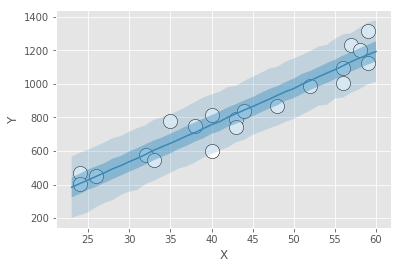

In [8]:
plt.scatter(df["X"],  df["Y"], s=200, color="white", edgecolors="black")
plt.fill_between(X_new, get_quantile_mcmc(y_mcmc, 2.5), get_quantile_mcmc(y_mcmc, 97.5), facecolor="C1", alpha=0.2)
plt.fill_between(X_new, get_quantile_mcmc(y_mcmc, 25), get_quantile_mcmc(y_mcmc, 75), facecolor="C1", alpha=0.4)
plt.plot(X_new, get_quantile_mcmc(y_mcmc, 50), color="C1")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()